In [1]:
# INPUT_PATH = '../input/instant-gratification/'
INPUT_PATH = '/home/lyz/work/kaggle/kaggle-instant-gratification/input/'

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 原始数据集 -》0.52
# wheezy-copper-turtle-magic -》分组 -》0.7+

train = pd.read_csv(INPUT_PATH+'train.csv')
test = pd.read_csv(INPUT_PATH+'test.csv')

In [3]:
train['wheezy-copper-turtle-magic']

0          99
1          52
2         230
3          78
4         497
         ... 
262139    372
262140    332
262141    448
262142    234
262143    380
Name: wheezy-copper-turtle-magic, Length: 262144, dtype: int64

In [23]:
train1 = train[train['wheezy-copper-turtle-magic'] == 91]

In [24]:
df = train1.drop(['id', 'wheezy-copper-turtle-magic', 'target'], axis=1).std()

<AxesSubplot:>

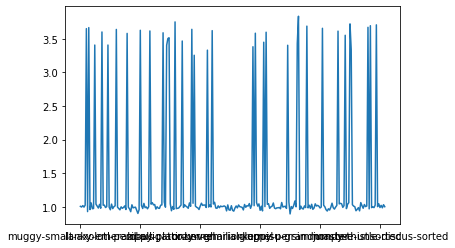

In [20]:
train1.drop(['id', 'wheezy-copper-turtle-magic', 'target'], axis=1).std().plot()

<AxesSubplot:>

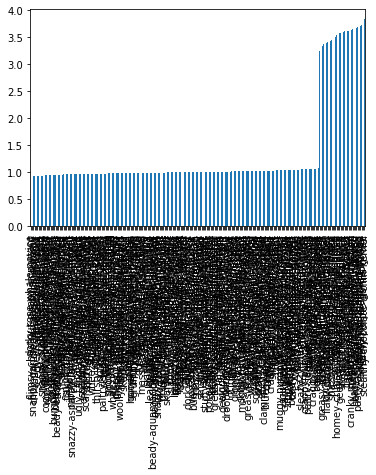

In [21]:
df.sort_values().plot(kind='bar')

In [25]:
df.sort_values()

whiny-flax-sloth-learn                 0.913176
beady-lilac-hornet-expert              0.927569
scanty-periwinkle-dhole-dataset        0.938083
cranky-champagne-jackal-gaussian       0.941339
trippy-harlequin-maltese-expert        0.951246
                                         ...   
stealthy-beige-pinscher-golden         3.974469
clammy-xanthic-affenpinscher-golden    3.976151
droopy-cardinal-impala-important       4.021063
crappy-carmine-eagle-entropy           4.048641
pasty-auburn-rat-entropy               4.206355
Length: 255, dtype: float64

In [26]:
from sklearn.feature_selection import VarianceThreshold
data2 = VarianceThreshold(threshold=2).fit_transform(train1.drop(['id', 'wheezy-copper-turtle-magic', 'target'], axis=1))

In [ ]:
train_oof = np.zeros(train.shape[0])
test_oof = np.zeros(test.shape[0])

from sklearn.model_selection import StratifiedKFold
col = [c for c in train.columns if c not in ['id', 'wheezy-copper-turtle-magic', 'target']]

# 先划分训练和验证集 -》按照turtle-magic取值进行划分
# 按照turtle-magic取值进行划分 -》先划分训练和验证集

from tqdm import tqdm
for i in tqdm(range(512)):
    train2 = train[train['wheezy-copper-turtle-magic'] == i]
    test2 = test[test['wheezy-copper-turtle-magic'] == i]
    
    from sklearn.feature_selection import VarianceThreshold
    train3 = VarianceThreshold(threshold=0.1).fit_transform(train2[col])
    test3 = VarianceThreshold(threshold=0.1).fit_transform(test2[col])
    
    skf = StratifiedKFold(n_splits=5)
    for tr_idx, val_idx in skf.split(train2, train2.target):
        
        # 如果不做方差筛选特征，
        # print(train3[tr_idx].shape, train3[val_idx].shape, test3[val_idx].shape)
        
        # 构造方法，反推标签
        from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
        clf = QuadraticDiscriminantAnalysis()
        clf.fit(train3[tr_idx], train2.target.iloc[tr_idx])
        train_oof[train2.iloc[val_idx].index] = clf.predict_proba(train3[val_idx])[:, 1]
        
        test_oof[test2.index] = clf.predict_proba(test3)[:, 1] / 5

100%|█████████▉| 511/512 [01:35<00:00,  5.37it/s]

In [59]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train['target'], train_oof)
print(f'AUC: {auc:.5}')

AUC: 0.96264


In [ ]:
# 筛选的特征，200未被筛选的特征
# 0.7+      0.5